In [1]:
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 41.7 MB/s 
     |████████████████████████████████| 16.7 MB 349 kB/s 
     |████████████████████████████████| 19.3 MB 120 kB/s 


In [2]:
%matplotlib inline
import contextily
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from shapely.geometry import Point
import xyzservices.providers as xyz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
regioni= geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g").to_crs(epsg= 3857)
province= geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g").to_crs(epsg= 3857)
autostrade=geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/Autostrade_10000_CT10_line.zip").to_crs(epsg= 3857)
parchi= geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/Parchi_regionali_e_nazionali_polygon.zip").to_crs(epsg= 3857)
comuni= geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g").to_crs(epsg= 3857)

#Dato il nome di una regione (inserito dall’utente), visualizzare su una mappa i confini della regione e le province di quella regione. Utilizzare il colore nero per i confini. Visualizzare anche il nome della provincia. Visualizzare poi un’altra mappa che colori ogni provincia a seconda del numero di comuni presenti. Usare le gradazioni di rosso. Controllare che la regione sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [5]:
cerca=input("inserire regione: ")

inserire regione: Lombardia


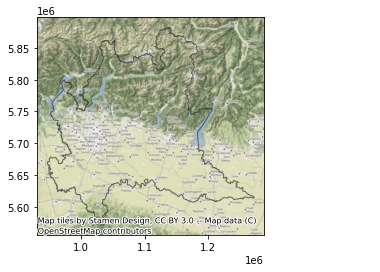

In [6]:
regione=regioni[regioni["DEN_REG"]==cerca]
if regione.empty:
  print("regione insesistente")
else:
  regioneGeo=regioni[regioni["DEN_REG"]==cerca].geometry.squeeze()
  ax=regione.to_crs(epsg=3857).plot(alpha=0.5,edgecolor="k",facecolor="none")
  contextily.add_basemap(ax=ax)

In [7]:
province.head(1)

COD_RIP  ...                                           geometry
0        1  ...  POLYGON ((874864.806 5716094.699, 875224.455 5...

[1 rows x 13 columns]

In [8]:
Ncomuni=comuni.groupby("COD_PROV").count()[["COMUNE"]].reset_index()
Ncomuni

COD_PROV  COMUNE
0           1     312
1           2      82
2           3      87
3           4     247
4           5     118
..        ...     ...
102       103      74
103       108      55
104       109      40
105       110      10
106       111     107

[107 rows x 2 columns]

In [9]:
provLomb=province[province["COD_REG"]==3]
provLomb

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((977496.810 5795557.306, 977766.355 5...
12         1  ...  MULTIPOLYGON (((999113.051 5774196.141, 998447...
13         1  ...  POLYGON ((1140946.690 5880005.212, 1141502.776...
14         1  ...  MULTIPOLYGON (((1055920.106 5651768.422, 10573...
15         1  ...  POLYGON ((1124685.301 5794558.642, 1124857.388...
16         1  ...  POLYGON ((1168638.759 5834169.163, 1168751.018...
17         1  ...  MULTIPOLYGON (((981438.909 5625033.644, 981200...
18         1  ...  POLYGON ((1061977.257 5698759.248, 1062287.732...
19         1  ...  POLYGON ((1187633.074 5688894.630, 1190861.104...
96         1  ...  POLYGON ((1048073.209 5795553.844, 1049803.860...
97         1  ...  POLYGON ((1051079.805 5695619.312, 1051458.693...
103        1  ...  POLYGON ((1030143.619 5738854.212, 1030780.027...

[12 rows x 13 columns]

In [10]:
ProvNComuni=pd.merge(provLomb,Ncomuni,on="COD_PROV",how="left")
ProvNComuni

COD_RIP  COD_REG  ...                                           geometry  COMUNE
0         1        3  ...  POLYGON ((977496.810 5795557.306, 977766.355 5...     138
1         1        3  ...  MULTIPOLYGON (((999113.051 5774196.141, 998447...     148
2         1        3  ...  POLYGON ((1140946.690 5880005.212, 1141502.776...      77
3         1        3  ...  MULTIPOLYGON (((1055920.106 5651768.422, 10573...     133
4         1        3  ...  POLYGON ((1124685.301 5794558.642, 1124857.388...     243
5         1        3  ...  POLYGON ((1168638.759 5834169.163, 1168751.018...     205
6         1        3  ...  MULTIPOLYGON (((981438.909 5625033.644, 981200...     186
7         1        3  ...  POLYGON ((1061977.257 5698759.248, 1062287.732...     113
8         1        3  ...  POLYGON ((1187633.074 5688894.630, 1190861.104...      64
9         1        3  ...  POLYGON ((1048073.209 5795553.844, 1049803.860...      84
10        1        3  ...  POLYGON ((1051079.805 5695619.312, 1051458.693...      60
11        1        3  ...  POLYGON ((1030143.619 5738854.212, 1030780.027...      55

[12 rows x 14 columns]

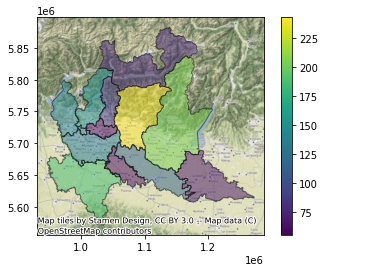

In [11]:
ax=ProvNComuni.to_crs(epsg=3857).plot(alpha=0.5,edgecolor="k",facecolor="g",column="COMUNE",legend=True)
contextily.add_basemap(ax)

#Dato il nome di una autostrada che attraversa la Lombardia (inserito dall’utente), visualizzare su una mappa il tracciato dell’autostrada e i parchi regionali che attraversa. I parchi devono essere colorati di verde ma in trasparenza deve essere possibile vedere la mappa della Lombardia. Controllare che il nome dell’autostrada sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [12]:
cerca=input("inserire autostrada: ")
lombardia=regioni[regioni["DEN_REG"]=="Lombardia"]
lombardiaGeo=regioni[regioni["DEN_REG"]=="Lombardia"].geometry.squeeze()

inserire autostrada: A4


In [15]:
autostrada

TS_EID  ...                                           geometry
16  1915.0  ...  LINESTRING (1015565.270 5703200.433, 1015626.2...
17  1916.0  ...  LINESTRING (1015565.270 5703200.433, 1015599.6...
18  1917.0  ...  LINESTRING (1139030.815 5701561.274, 1139093.7...
19  1918.0  ...  LINESTRING (1139150.357 5701504.387, 1139223.4...
20    45.0  ...  LINESTRING (978653.369 5695869.914, 978711.560...
21    46.0  ...  LINESTRING (978656.293 5695840.631, 978708.608...

[6 rows x 4 columns]

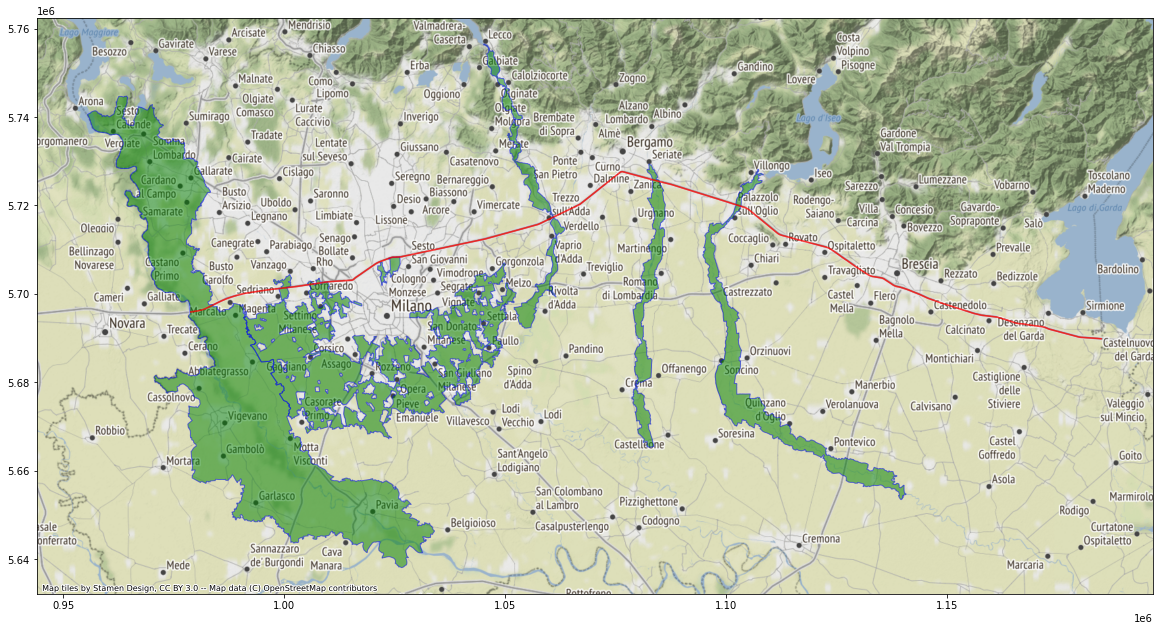

In [14]:
autostrada=autostrade[autostrade["COD_PE"]==cerca]
if autostrada.empty:
  print("autostrada insesistente")
else:
    parchiAU= parchi[parchi.intersects(autostrada.unary_union)]
    autostradaGeo=autostrade[autostrade["COD_PE"]==cerca].geometry.squeeze()
    ax=autostrada.to_crs(epsg=3857).plot(figsize=(20,20),alpha=0.5,edgecolor="r",facecolor="none")
    parchiAU.to_crs(epsg=3857).plot(ax=ax, facecolor="g", alpha=0.5, edgecolor="b")
    contextily.add_basemap(ax)

#Visualizzare tutti i comuni che si trovano a meno di una certa distanza (inserita dall’utente) da un comune (inserito anch’esso dall’utente).

Inserisci un comune: Bresso
Inserisci una distanza: 10


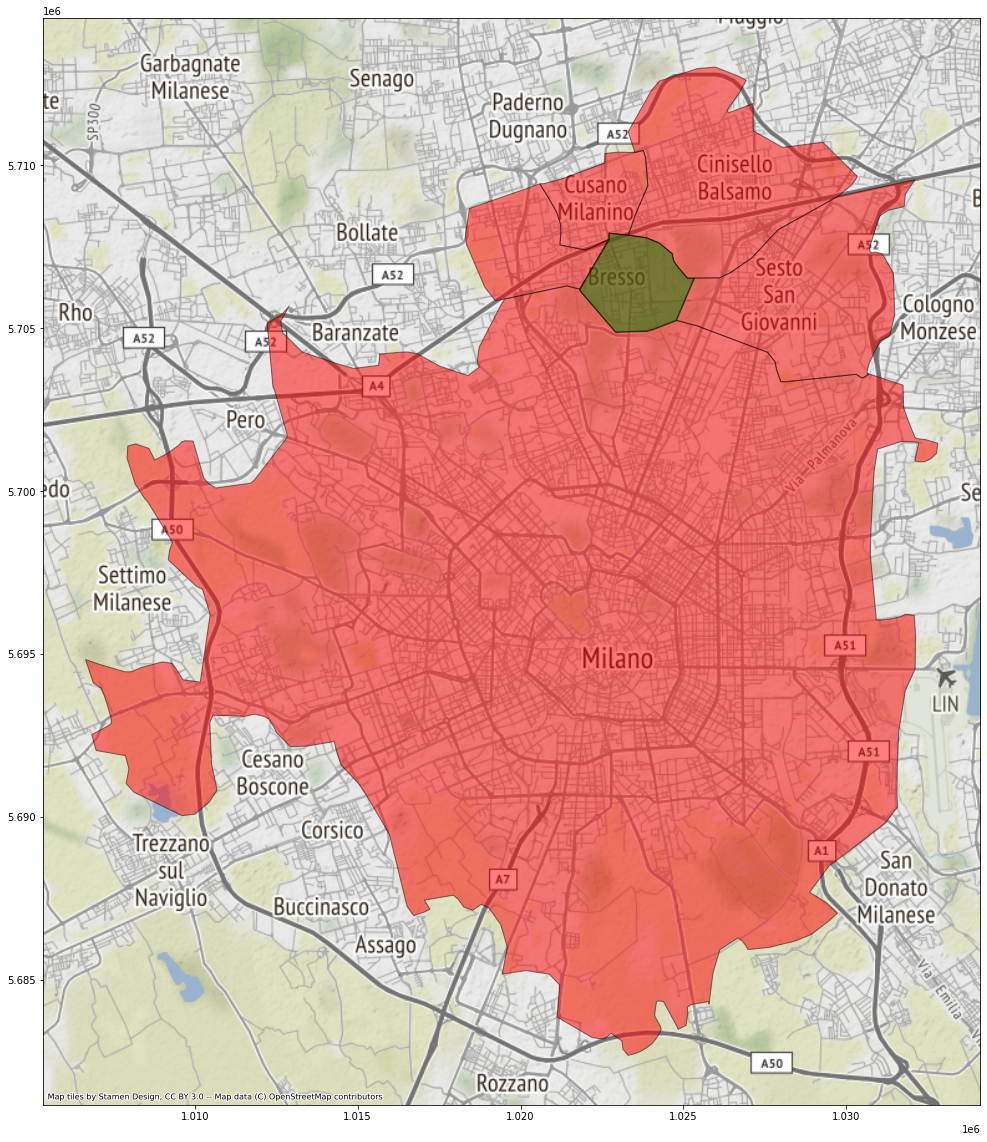

In [16]:
nome_comune = input("Inserisci un comune: ")
distanza = int(input("Inserisci una distanza: "))

comune = comuni[comuni["COMUNE"] == nome_comune]
comune_squeeze = comune.geometry.squeeze()
comune_buffer = comune_squeeze.buffer(distanza)

comuni_in_distanza = comuni[comuni.intersects(comune_buffer)]

ax = comuni_in_distanza.to_crs(epsg = 3857).plot(edgecolor = "k", figsize = (20,20), facecolor = "red", alpha = 0.5)
comune.to_crs(epsg = 3857).plot(ax = ax, edgecolor = "black", facecolor = "green", alpha = 0.5)
contextily.add_basemap(ax)